import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

load the Dataset

In [2]:
Titanic= pd.read_csv(r"C:\Users\Dell\Downloads\Titanic dataset.csv")

In [3]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pre-Processing

Dropping features not needed for the model

In [4]:
Titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Create categorical dummies for the embarkment ports

In [5]:
ports=pd.get_dummies(Titanic.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [6]:
Titanic= Titanic.join(ports)
Titanic.drop(['Embarked'], axis=1, inplace=True)

Transform gender names to binary
transform the 'male' and 'female' names to binaries (0 and 1) through mapping

In [7]:
Titanic.Sex=Titanic.Sex.map({'male':0, 'female':1})

Replace missing values

In [8]:
Titanic[pd.isnull(Titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,0,NaN,0,0,8.4583,0,1,0
17,1,2,0,NaN,0,0,13.0000,0,0,1
19,1,3,1,NaN,0,0,7.2250,1,0,0
26,0,3,0,NaN,0,0,7.2250,1,0,0
28,1,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,1,0,0
863,0,3,1,NaN,8,2,69.5500,0,0,1
868,0,3,0,NaN,0,0,9.5000,0,0,1
878,0,3,0,NaN,0,0,7.8958,0,0,1


In [10]:
Titanic.Age.fillna(Titanic.Age.mean(), inplace=True)

Train and Test Split

In [11]:
y= Titanic.Survived.copy()
x= Titanic.drop(['Survived'], axis=1)

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=123)

Logistic Regression Model

In [14]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

using the model to predict whether the passenger included in the test set survived the shipwreck or not

In [15]:
y_pred=pd.Series(model.predict(x_test))
y_test= y_test.reset_index(drop=True)
z=pd.concat([y_test, y_pred], axis=1)
z.columns= ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
considering the first five observations of the test set, the logistic regression model predicted 4 out of 5 correctly.

Evaluating the entire data set, using the metrics module from sklearn package.

In [16]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy 0.8071748878923767
Precision: 0.759493670886076
Recall: 0.7142857142857143


In [ ]:
this implies that the Logistic Regression model is 80.7% accurate

Using confusion matrix to visualize the model

using Matplotlib and seaborn 

Text(0.5, 15.0, 'Predicted')

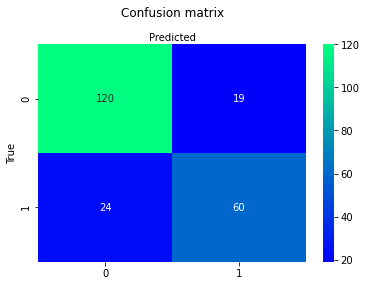

In [27]:
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
labels= [0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="winter", fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

in the confusion matrix, 120 people that  didnt survive the shipwreck were correctly predicted as not survived, 19 passengers were predicted as survived but they didnt survive, 24 passengers were predicted as not survived but they actually survived the shipwreck and the 60 thta were predicted as survived actually survived the shipwreck.